In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
import numpy as np
from skimage import io
from skimage import color

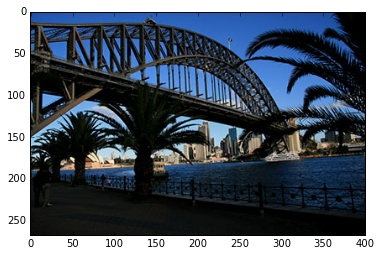

In [2]:
im = io.imread('test/P1-bridge.jpg')
plt.imshow(im)

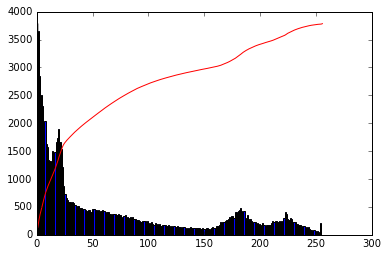

In [3]:
im_hsv = color.rgb2hsv(skimage.img_as_float(im))
imv = im_hsv[:,:,2]
imhist, bins = np.histogram(imv.flatten()*255,256,[0,256])
cdf = imhist.cumsum().astype(float)
cdf_normalized = cdf * imhist.max() / cdf.max()

plt.hist(imv.flatten()*255, 256)
plt.plot(bins[1:], cdf_normalized, color = 'r')
plt.show()

/u/s/i/sidharth/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


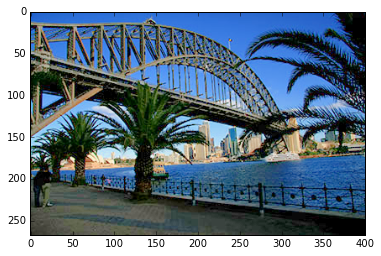

In [4]:
mapping = (cdf-cdf.min()) * 255 / (cdf.max() - cdf.min())
mapped_imv = mapping[(imv * 255).astype('uint8')]
mapped_scaled_imv = mapped_imv / 255

im_hsv_eq = np.concatenate([im_hsv[:,:,:2], np.expand_dims(mapped_scaled_imv, axis=2)], axis=2)
im_eq = color.hsv2rgb(im_hsv_eq)
io.imsave('output/P1-bridge-out.jpg', skimage.img_as_ubyte(im_eq))
plt.imshow(im_eq)

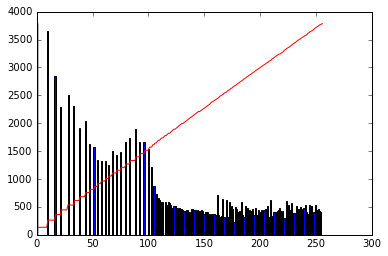

In [5]:
imhist, bins = np.histogram(mapped_scaled_imv.flatten()*255,256,[0,256])
cdf = imhist.cumsum().astype(float)
cdf_normalized = cdf * imhist.max() / cdf.max()

plt.hist(mapped_scaled_imv.flatten()*255, 256)
plt.plot(bins[1:], cdf_normalized, color = 'r')
plt.show()